In [4]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:/Users/ashly/OneDrive/Desktop/DataScience Anaconda/Regression/insurance.csv")
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


In [5]:
from sklearn.model_selection import cross_val_score


In [6]:
data['sex'] =data['sex'].astype('category')
data['sex']=data['sex'].cat.codes

data['smoker'] =data['smoker'].astype('category')
data['smoker']=data['smoker'].cat.codes

data['region'] =data['region'].astype('category')
data['region']=data['region'].cat.codes

In [7]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924000
1,18,1,33.770,1,0,2,1725.552300
2,28,1,33.000,3,0,2,4449.462000
3,33,1,22.705,0,0,1,21984.470610
4,32,1,28.880,0,0,1,3866.855200
5,31,0,25.740,0,0,2,3756.621600
6,46,0,33.440,1,0,2,8240.589600
7,37,0,27.740,3,0,1,7281.505600
8,37,1,29.830,2,0,0,6406.410700
9,60,0,25.840,0,0,1,28923.136920


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
x=data.drop(columns='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
5,31,0,25.740,0,0,2
6,46,0,33.440,1,0,2
7,37,0,27.740,3,0,1
8,37,1,29.830,2,0,0
9,60,0,25.840,0,0,1


In [10]:
y=data['charges']

In [11]:
y

0       16884.924000
1        1725.552300
2        4449.462000
3       21984.470610
4        3866.855200
5        3756.621600
6        8240.589600
7        7281.505600
8        6406.410700
9       28923.136920
10       2721.320800
11      27808.725100
12       1826.843000
13      11090.717800
14      39611.757700
15       1837.237000
16      10797.336200
17       2395.171550
18      10602.385000
19      36837.467000
20      13228.846950
21       4149.736000
22       1137.011000
23      37701.876800
24       6203.901750
25      14001.133800
26      14451.835150
27      12268.632250
28       2775.192150
29      38711.000000
30      35585.576000
31       2198.189850
32       4687.797000
33      13770.097900
34      51194.559140
35       1625.433750
36      15612.193350
37       2302.300000
38      39774.276300
39      48173.361000
40       3046.062000
41       4949.758700
42       6272.477200
43       6313.759000
44       6079.671500
45      20630.283510
46       3393.356350
47       3556

In [12]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [13]:
y_train

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
472      1744.46500
1139    36898.73308
642     13143.86485
729      6781.35420
1322    12981.34570
748      8556.90700
1232    12479.70895
175     48824.45000
880      3443.06400
81       7935.29115
397     16586.49771
267     14590.63205
77       1532.46970
769      6933.24225
942      2217.46915
386     11856.41150
533     19214.70553
950     11534.87265
856     40974.16490
979      4889.03680
1093    33907.54800
1100    16776.30405
1166    10982.50130
88       8026.66660
1047    44501.39820
652      8280.62270
625      3736.46470
563      9058.73030
1011    18767.73770
500     36197.69900
117     19107.77960
520     25656.57526
422     39125.33225
294      3906.12700
261     17085.26760
1271     3021.80915
1313    36397.57600
2        4449.46200
405     11396.90020
482      1622.18850
338     41919.09700
356      8944.11510
869      4391.65200
182      4005.42250
704      8930.93455


In [14]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [15]:
c=regression.intercept_
c

-11827.733141795667

In [16]:
m=regression.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [17]:
y_pred_train=regression.predict(x_train)

In [18]:
y_pred_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

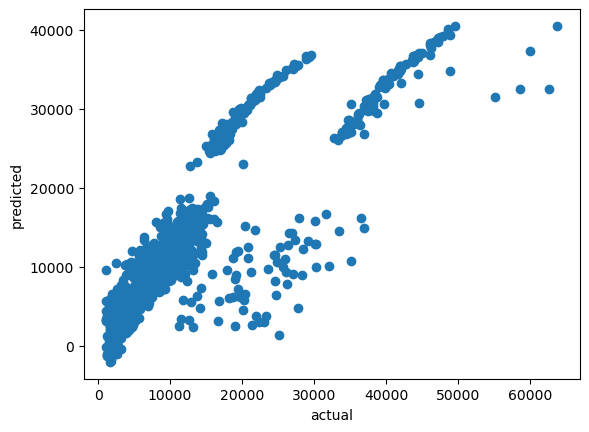

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [20]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.7306840408360217

In [21]:
y_pred_test=regression.predict(x_test)

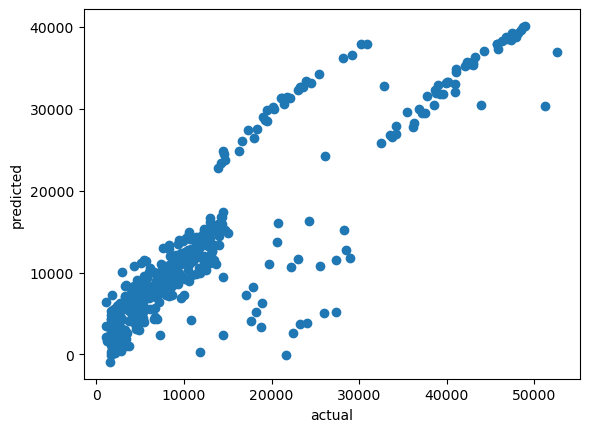

In [22]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [23]:
r2_score(y_test,y_pred_test)

0.7911113876316933

In [24]:
import numpy as np

In [25]:
mse=cross_val_score(regression,x,y,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
mean_mse


-36862396.25887291